<a href="https://colab.research.google.com/github/mrinard/MSBA604Data/blob/main/Project_3_Visualizations_Matthew_Rinard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project #3: Visualizations**

Please download these files and upload to content folder:

*   Olympics Data: https://www.kaggle.com/datasets/harshvgh/olympics (Only athlete_events data)
*   SNAP Benefits Data: https://github.com/mrinard/MSBA604Data/blob/main/SNAP%20Data.csv
*   Poverty Rates Data: https://github.com/mrinard/MSBA604Data/blob/main/Cleaned_poverty_Data.csv



## **Olympics Medal Count**
### **Racing Bar Chart: Using bar_chart_race**

In [ ]:
pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 9.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(io.BytesIO())
/usr/local

Racing bar chart generated and saved as 'olympic_medals_race.mp4'


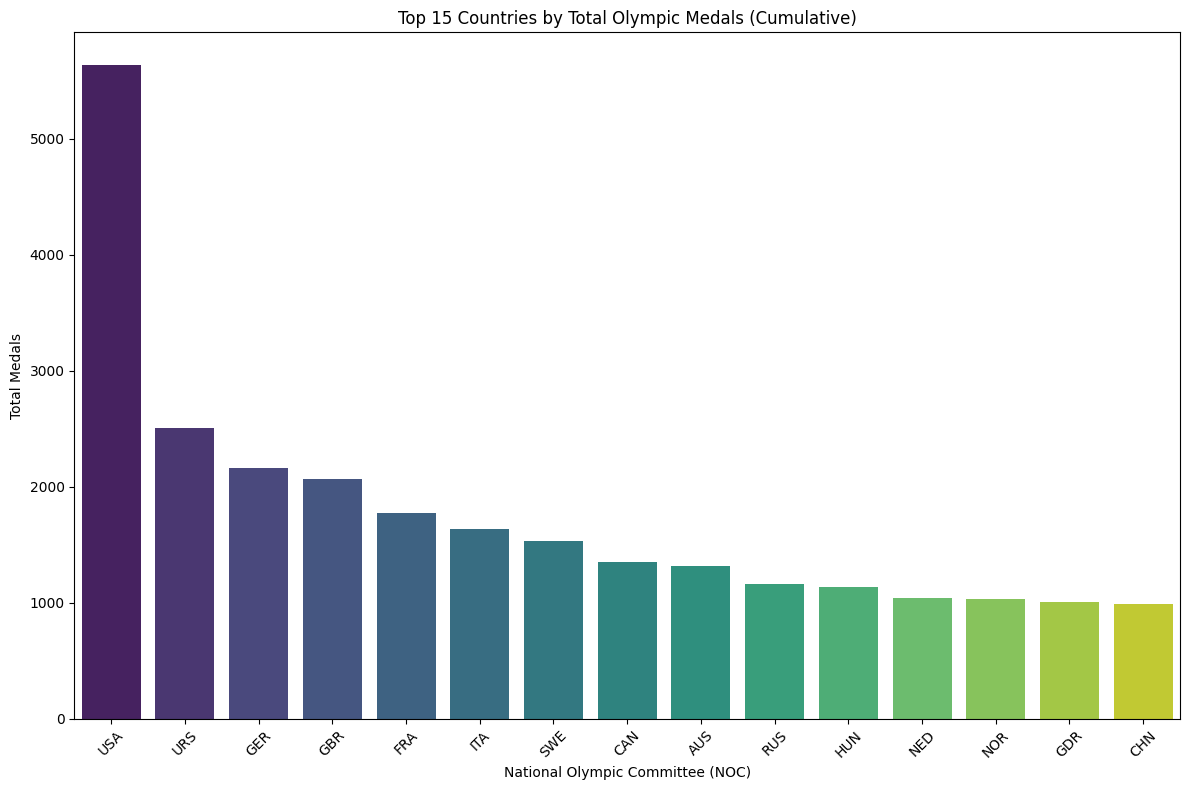

Bar chart showing top 15 countries by total Olympic medals has been generated.


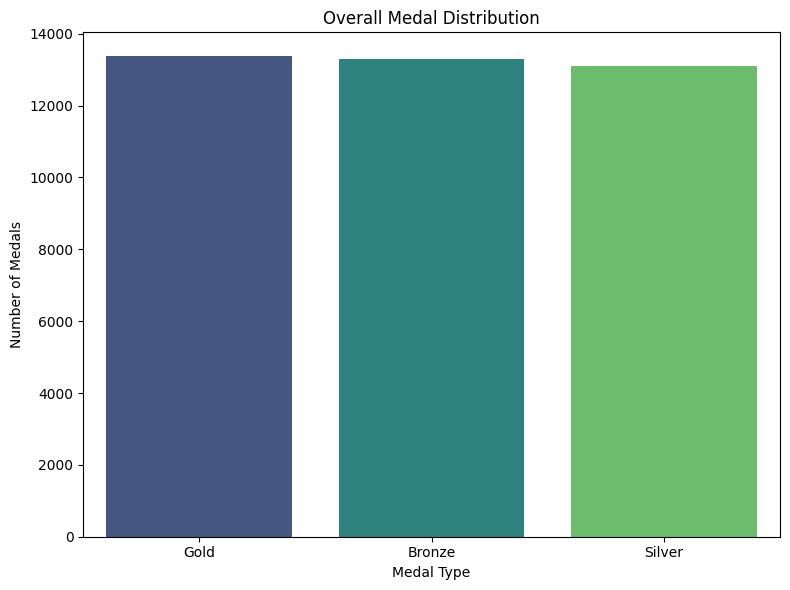

Bar chart showing overall medal distribution has been generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr

# Load data
olympics = pd.read_csv('athlete_events.csv')

# 1. Prepare Data for Racing Bar Chart
medals_df = olympics.dropna(subset=['Medal'])
medals_per_year_noc = medals_df.groupby(['Year', 'NOC'])['Medal'].count().reset_index()
medals_pivot = medals_per_year_noc.pivot_table(index='Year', columns='NOC', values='Medal').fillna(0)
cumulative_medals = medals_pivot.cumsum()

cumulative_medals.index = cumulative_medals.index.astype(int)

# 2. Generate Racing Bar Chart
bcr.bar_chart_race(
    df=cumulative_medals,
    filename='olympic_medals_race.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    interpolate_period=False,
    label_bars=True,
    bar_size=.9,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_summary_func=lambda v, r: {'x': .99, 'y': .18, 's': f'Total medals: {v.sum():,.0f}', 'ha': 'right', 'va': 'center'},
    perpendicular_bar_func=None,
    period_length=500,
    figsize=(10, 6),
    dpi=144,
    cmap='dark12',
    title='Cumulative Olympic Medals by Country (NOC) Over Years'
)
print("Racing bar chart generated and saved as 'olympic_medals_race.mp4'")

# 3. Generate Top Countries Bar Chart
top_n = 15
total_medals_per_noc = medals_df['NOC'].value_counts().reset_index()
total_medals_per_noc.columns = ['NOC', 'Total Medals']
top_countries = total_medals_per_noc.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='NOC', y='Total Medals', hue='NOC', data=top_countries, palette='viridis', legend=False)
plt.title(f'Top {top_n} Countries by Total Olympic Medals (Cumulative)')
plt.xlabel('National Olympic Committee (NOC)')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"Bar chart showing top {top_n} countries by total Olympic medals has been generated.")

# 4. Prepare Data for Medal Distribution
medal_counts = olympics['Medal'].dropna().value_counts()

# 5. Generate Medal Distribution Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=medal_counts.index, y=medal_counts.values, hue=medal_counts.index, palette='viridis', legend=False)
plt.title('Overall Medal Distribution')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()
print("Bar chart showing overall medal distribution has been generated.")

## **Olympics Medal Count**
### **Racing Bar Chart: Using plotly_express**

In [ ]:
!pip install plotly_express

In [ ]:
import plotly.express as px

# Reset the index to make 'Year' a regular column before melting
cumulative_medals_reset = cumulative_medals.reset_index()

# Melt the DataFrame to long format for Plotly Express
cumulative_medals_long = cumulative_medals_reset.melt(
    id_vars='Year',
    var_name='NOC',
    value_name='Total Medals'
)

# Ensure 'Year' is integer for correct animation frame ordering (if not already)
cumulative_medals_long['Year'] = cumulative_medals_long['Year'].astype(int)

# Filter out entries with zero medals at the start to make the animation cleaner if desired.
# For a racing chart, typically we want to see countries appear as they earn medals.
# However, plotly handles zeros by not drawing bars, which is often sufficient.
# Let's keep all data points for now to show progression from zero.

# Filter to show only the top 15 NOCs for each year
def get_top_n_per_year(df, n=15):
    top_n_df = df.groupby('Year').apply(
        lambda x: x.nlargest(n, 'Total Medals')
    ).reset_index(drop=True)
    return top_n_df

cumulative_medals_top_15 = get_top_n_per_year(cumulative_medals_long, n=15)

display(cumulative_medals_top_15.head())

/tmp/ipython-input-2024429531.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_n_df = df.groupby('Year').apply(


,Year,NOC,Total Medals
0,1896,GRE,48.0
1,1896,GER,32.0
2,1896,USA,20.0
3,1896,FRA,11.0
4,1896,GBR,9.0


In [ ]:
fig = px.bar(
    cumulative_medals_top_15, # Use the filtered DataFrame
    x='Total Medals',
    y='NOC',
    animation_frame='Year',
    animation_group='NOC',
    color='NOC', # Color bars by NOC
    hover_name='NOC',
    title='Cumulative Olympic Medals: Top 15 Countries (NOC) Over Years (Plotly Express)', # Updated title
    orientation='h', # Horizontal bars
    range_x=[0, cumulative_medals_long['Total Medals'].max() * 1.05] # Set a fixed max x-range for consistency
)

# Update layout for better readability and to ensure bars are sorted within each frame
fig.update_layout(
    xaxis_title='Total Medals',
    yaxis_title='Country (NOC)',
    yaxis={'categoryorder':'total ascending'} # Order by total medals at each frame (racing effect)
)

# Adjust playback speed (optional, default is 500ms per frame)
# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100

fig.show()

## **SNAP Benefits on Poverty Rate**
### **Animated Scatter Plot: Using plotly.express**

In [ ]:
import pandas as pd

In [ ]:
poverty = pd.read_csv('Cleaned_poverty_Data.csv')
SNAP = pd.read_csv('SNAP Data.csv')

In [ ]:
# Load SNAP data and rename 'Location' to 'state_name'
snap_df = pd.read_csv('SNAP Data.csv', skiprows=2)
snap_df = snap_df.rename(columns={'Location': 'state_name'})

# Unpivot fiscal year columns to 'fiscal_year_str' and 'snap_benefits'
fiscal_year_columns = [col for col in snap_df.columns if 'FY' in col and 'Total Benefits' in col]
snap_df_melted = snap_df.melt(id_vars=['state_name'],
                                   value_vars=fiscal_year_columns,
                                   var_name='fiscal_year_str',
                                   value_name='snap_benefits')

# Extract year from 'fiscal_year_str' and convert 'snap_benefits' to numeric
snap_df_melted['year'] = snap_df_melted['fiscal_year_str'].str.extract('FY(\\d{4})').astype(int)
snap_df_melted['snap_benefits'] = pd.to_numeric(snap_df_melted['snap_benefits'])

snap_df_cleaned = snap_df_melted[['state_name', 'year', 'snap_benefits']]

# Load poverty data and rename 'State' to 'state_name'
poverty_df = pd.read_csv('Cleaned_poverty_Data.csv')
poverty_df = poverty_df.rename(columns={'State': 'state_name', 'Year': 'year'})

# Clean numeric columns: remove commas and convert to numeric
poverty_df['Total population'] = poverty_df['Total population'].str.replace(',', '', regex=False).astype(float)
poverty_df['Number in poverty'] = poverty_df['Number in poverty'].str.replace(',', '', regex=False).astype(float)

# Calculate poverty rate
poverty_df['poverty_rate'] = (poverty_df['Number in poverty'] / poverty_df['Total population']) * 100

# Convert 'year' to numeric, coercing errors to NaN, then drop rows with NaN years
poverty_df['year'] = pd.to_numeric(poverty_df['year'].str.replace(',', '', regex=False), errors='coerce')
poverty_df.dropna(subset=['year'], inplace=True)
poverty_df['year'] = poverty_df['year'].astype(int)

# Merge poverty and SNAP data
merged_poverty_snap_df = pd.merge(poverty_df, snap_df_cleaned, on=['state_name', 'year'], how='inner')

# Sort the dataframe to ensure chronological order for animation and consistent display
merged_poverty_snap_df = merged_poverty_snap_df.sort_values(by='year').reset_index(drop=True)

# Generate animated scatter plot
import plotly.express as px

fig = px.scatter(merged_poverty_snap_df,
                 x="poverty_rate",
                 y="snap_benefits",
                 animation_frame="year",
                 animation_group="state_name",
                 hover_name="state_name",
                 size='snap_benefits', # Use SNAP benefits for size, assuming higher benefits for larger states/populations
                 color="state_name", # Assign a unique color to each state
                 title='SNAP Benefits vs. Poverty Rate Over Time by State',
                 labels={'poverty_rate': 'Poverty Rate (%)', 'snap_benefits': 'SNAP Benefits (USD)'})

fig.show()

## **SNAP Benefits on Poverty Rate**
### **Animated Scatter Plot: Using matplotlib.animation**

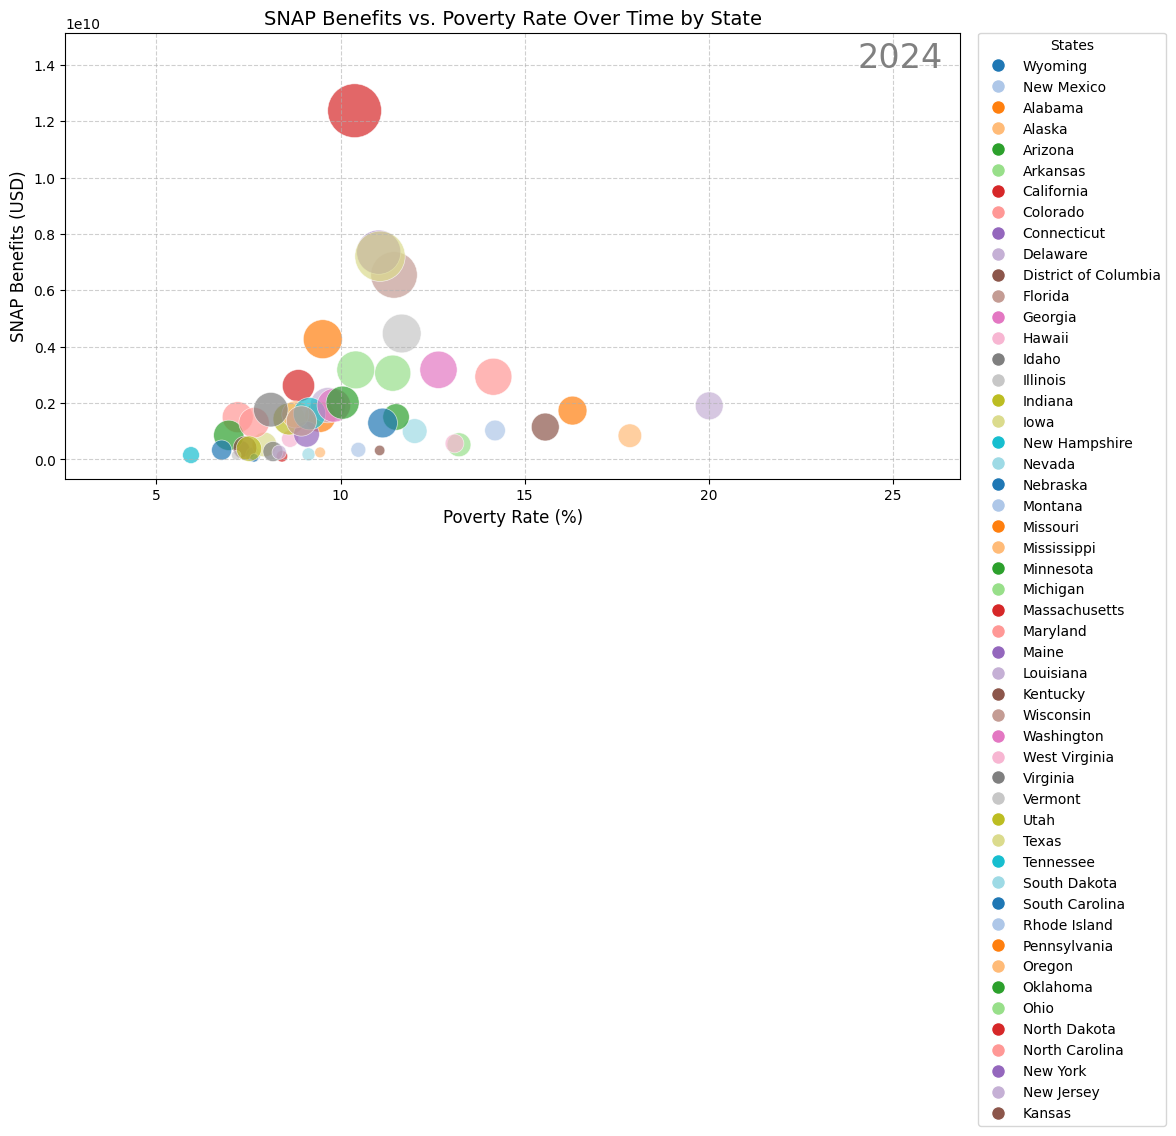

Animation generated and saved as 'poverty_snap_animation.mp4'


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Ensure the dataframe is sorted by year and relevant columns are present
# (This step was previously done, but included here for completeness)
# merged_poverty_snap_df = merged_poverty_snap_df.sort_values(by='year').reset_index(drop=True)

# 1. Create a figure and an axes object
fig, ax = plt.subplots(figsize=(14, 9))

# 2. Identify min/max values for consistent scaling
min_poverty_rate = merged_poverty_snap_df['poverty_rate'].min()
max_poverty_rate = merged_poverty_snap_df['poverty_rate'].max()
min_snap_benefits = merged_poverty_snap_df['snap_benefits'].min()
max_snap_benefits = merged_poverty_snap_df['snap_benefits'].max()
min_population = merged_poverty_snap_df['Total population'].min()
max_population = merged_poverty_snap_df['Total population'].max()

# Marker size scaling parameters
min_size_display = 20
max_size_display = 1500

# Create a color map for states
unique_states = merged_poverty_snap_df['state_name'].unique()
unique_states = [s for s in unique_states if s != 'United States']
num_states = len(unique_states)
colors_map = plt.colormaps.get_cmap('tab20')
state_color_dict = {state: colors_map(i % 20) for i, state in enumerate(unique_states)}

# Filter data for the earliest year
first_year = merged_poverty_snap_df['year'].min()
initial_data = merged_poverty_snap_df[
    (merged_poverty_snap_df['year'] == first_year) &
    (merged_poverty_snap_df['state_name'] != 'United States')
]

# Calculate scaled marker sizes for initial data
scaled_initial_sizes = (np.sqrt(initial_data['Total population']) - np.sqrt(min_population)) / \
                       (np.sqrt(max_population) - np.sqrt(min_population)) * \
                       (max_size_display - min_size_display) + min_size_display

scaled_initial_sizes.fillna(min_size_display, inplace=True)
scaled_initial_sizes[scaled_initial_sizes < min_size_display] = min_size_display

# Get colors for initial data using the state_color_dict
initial_colors = initial_data['state_name'].map(state_color_dict).values

# 3. Create an initial scatter plot
scat = ax.scatter(initial_data['poverty_rate'],
                  initial_data['snap_benefits'],
                  s=scaled_initial_sizes,
                  c=initial_colors,
                  alpha=0.7,
                  edgecolors='w',
                  linewidth=0.5,
                  label=[])

# 4. Set axis labels and title
ax.set_xlabel('Poverty Rate (%)', fontsize=12)
ax.set_ylabel('SNAP Benefits (USD)', fontsize=12)
ax.set_title('SNAP Benefits vs. Poverty Rate Over Time by State', fontsize=14)

# 5. Set fixed x-axis and y-axis limits
x_padding = (max_poverty_rate - min_poverty_rate) * 0.05
y_padding = (max_snap_benefits - min_snap_benefits) * 0.05
ax.set_xlim(min_poverty_rate - x_padding, max_poverty_rate + x_padding)
ax.set_ylim(min_snap_benefits - y_padding, max_snap_benefits + y_padding)

# 6. Add a text annotation for the current year
year_text = ax.text(0.98, 0.98, str(first_year), transform=ax.transAxes,
                    fontsize=24, color='gray', ha='right', va='top')

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=state,
                             markerfacecolor=state_color_dict[state], markersize=10)
                  for state in unique_states]

ax.legend(handles=legend_handles, title="States", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Get unique years for animation frames
years = merged_poverty_snap_df['year'].unique()

# 7. Define the update function for the animation
def update(frame):
    current_year = years[frame]
    current_data = merged_poverty_snap_df[
        (merged_poverty_snap_df['year'] == current_year) &
        (merged_poverty_snap_df['state_name'] != 'United States')
    ]

    scat.set_offsets(current_data[['poverty_rate', 'snap_benefits']].values)

    scaled_current_sizes = (np.sqrt(current_data['Total population']) - np.sqrt(min_population)) / \
                           (np.sqrt(max_population) - np.sqrt(min_population)) * \
                           (max_size_display - min_size_display) + min_size_display

    scaled_current_sizes.fillna(min_size_display, inplace=True)
    scaled_current_sizes[scaled_current_sizes < min_size_display] = min_size_display

    scat.set_sizes(scaled_current_sizes)

    current_colors = current_data['state_name'].map(state_color_dict).values
    scat.set_facecolors(current_colors)

    year_text.set_text(str(current_year))

    return scat, year_text,

# 8. Generate and display animation
ani = animation.FuncAnimation(fig, update, frames=len(years), blit=False, interval=200)

# Save as MP4
ani.save('poverty_snap_animation.mp4', fps=5)

plt.show()

print("Animation generated and saved as 'poverty_snap_animation.mp4'")